<a href="https://colab.research.google.com/github/Nishanth-developer/20BCE0118-NISHANTH-PRAC-BOOKS/blob/main/missingdata_nishanth_20BCE0118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv("property data.csv")
print(d)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


`Pandas automatically detects Nan and empty value as missing value.`

In [ ]:
print(d['PID'].isnull())

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool


`To include other kind of null values as missing data:`

`In below code, actually the last element shd be true.`

In [ ]:
print(d['NUM_BEDROOMS'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


`Hence`

In [ ]:
miss_list=['--','na']
d=pd.read_csv('property data.csv',na_values=miss_list)
print(d)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           1.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0


`Now time for unexpected missing values. ie) data type collisions`

`OWN_OCCUPIED has 12(int value) though it is of type bool ( Y/N string)`

In [ ]:
print(d['OWN_OCCUPIED'])

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


In [ ]:
print(d['OWN_OCCUPIED'].isnull())

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool


`Here third entry should be true`

In [ ]:
ci=0
for i in d['OWN_OCCUPIED']:
    try:
        a=int(i)
        d['OWN_OCCUPIED'][ci]=np.nan
    except ValueError:
        pass
    ci+=1
print(d['OWN_OCCUPIED'])

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(d['OWN_OCCUPIED'])

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


`Hence that third integer is finally rectified`

In [ ]:
print(d)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           1.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0


`Now we are done with giving null values at apt places`
`Now Summarizing the entire missing elements (count)`

In [ ]:
print(d.isnull().values.any())

True


In [ ]:
print(d.isnull().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64


`Total count of missing values`

In [ ]:
print(d.isnull().sum().sum())

11


`Filling missing values (imputation)`

`Using Mean - Common imputations using mean,median,mode`



In [ ]:
import pandas as pd
import numpy as np
miss_list=['--','na']
d=pd.read_csv('property data.csv',na_values=miss_list)
ci=0
for i in d['OWN_OCCUPIED']:
    try:
        a=int(i)
        d['OWN_OCCUPIED'][ci]=np.nan
    except ValueError:
        pass
    ci+=1
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
mean=d['PID'].mean()
e=d.copy()
e['PID'].fillna(mean,inplace=True)
print(e)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4  100005000.0   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           1.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0
           PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N     

In [ ]:
me=e['ST_NUM'].median()
e['ST_NUM'].fillna(me,inplace=True)
e

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,203.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,203.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
mo=e['OWN_OCCUPIED'].mode()
e['OWN_OCCUPIED'].fillna(mo,inplace=True)
e
y,n=0,0
for i in e['OWN_OCCUPIED']:
  if i=='Y':
    y+=1
  elif i=='N':
    n+=1
if y>=n:
  e['OWN_OCCUPIED']=e['OWN_OCCUPIED'].replace(np.nan,'Y')
e


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,203.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,203.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
mo=e['NUM_BEDROOMS'].mode()
e['NUM_BEDROOMS']=e['NUM_BEDROOMS'].replace(np.nan,int(mo))
e

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,203.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,203.0,WASHINGTON,Y,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [ ]:
mo1=e['NUM_BATH'].mode()
for i in e['NUM_BATH']:
  try:
    a=int(i)
    pass
  except ValueError:
    e['NUM_BATH']=e['NUM_BATH'].replace(i,np.nan)
e['NUM_BATH'].fillna(int(mo1),inplace=True)
e['SQ_FT'].fillna(e['SQ_FT'].mean(),inplace=True)
e

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1,1100.0
2,100003000.0,203.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,1,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,203.0,WASHINGTON,Y,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


`But the above derived dataset is not perfect. Hence we should go for some advanced imputations`

`Before that : skitleanr`

`Let me recreate the original table ( contains missing values )`

`Filling (imputing) the null values with mean, median, mode using sklearn`

`Original table`

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
dor=pd.read_csv('property data.csv')
print(dor)

           PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y            1        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800


`Normalised all diff transforms of Nan to np.nan`

In [ ]:
miss=['--','na']
dor=pd.read_csv('property data.csv',na_values=miss)
dor

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
miss=['--','na']
d=pd.read_csv('property data.csv',usecols=['PID','ST_NUM','NUM_BEDROOMS','SQ_FT'],na_values=miss)
d.head()

,PID,ST_NUM,NUM_BEDROOMS,SQ_FT
0,100001000.0,104.0,3.0,1000.0
1,100002000.0,197.0,3.0,NaN
2,100003000.0,NaN,NaN,850.0
3,100004000.0,201.0,1.0,700.0
4,NaN,203.0,3.0,1600.0


In [ ]:
imp=SimpleImputer(strategy='mean')
imp.fit(d)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

`4 mean values are added to 4 columns specified`

In [ ]:
imp.statistics_

array([1.00005000e+08, 1.91428571e+02, 2.16666667e+00, 1.10000000e+03])

In [ ]:
d=imp.transform(d)
d

array([[1.00001000e+08, 1.04000000e+02, 3.00000000e+00, 1.00000000e+03],
       [1.00002000e+08, 1.97000000e+02, 3.00000000e+00, 1.10000000e+03],
       [1.00003000e+08, 1.91428571e+02, 2.16666667e+00, 8.50000000e+02],
       [1.00004000e+08, 2.01000000e+02, 1.00000000e+00, 7.00000000e+02],
       [1.00005000e+08, 2.03000000e+02, 3.00000000e+00, 1.60000000e+03],
       [1.00006000e+08, 2.07000000e+02, 2.16666667e+00, 8.00000000e+02],
       [1.00007000e+08, 1.91428571e+02, 2.00000000e+00, 9.50000000e+02],
       [1.00008000e+08, 2.13000000e+02, 1.00000000e+00, 1.10000000e+03],
       [1.00009000e+08, 2.15000000e+02, 2.16666667e+00, 1.80000000e+03]])

In [ ]:
dfin=pd.DataFrame(d,columns=['PID','ST_NUM','NUM_BEDROOMS','SQ_FT'])
dfin

,PID,ST_NUM,NUM_BEDROOMS,SQ_FT
0,100001000.0,104.000000,3.000000,1000.0
1,100002000.0,197.000000,3.000000,1100.0
2,100003000.0,191.428571,2.166667,850.0
3,100004000.0,201.000000,1.000000,700.0
4,100005000.0,203.000000,3.000000,1600.0
5,100006000.0,207.000000,2.166667,800.0
6,100007000.0,191.428571,2.000000,950.0
7,100008000.0,213.000000,1.000000,1100.0
8,100009000.0,215.000000,2.166667,1800.0




---

---

**`Practice -- `**

> **`Numpy, Pandas, Matplotlib`**





---

---









**Numpy** - **Num**erical **Py**thon 

Creating array

In [ ]:
import numpy as np
ar=np.array([1,7,6,2])
print(ar)
print(type(ar))

[1 7 6 2]
<class 'numpy.ndarray'>


-Passing as **tuple**

In [ ]:
ar=np.array((3,6,9,12))
print(ar)

[ 3  6  9 12]


In [ ]:
ar=np.array([[1,2,4],[3,7,8],[5,7,1]])
ar

array([[1, 2, 4],
       [3, 7, 8],
       [5, 7, 1]])

In [ ]:
ar=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
ar

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [ ]:
print(ar.ndim)

3


In [ ]:
ar1=np.array([9,8,7,6,5], ndmin=4)
ar1

array([[[[9, 8, 7, 6, 5]]]])

In [ ]:
ar=np.array([1,2,3,5,6])
ar[2]

3

In [ ]:
ar=np.array([[1,2,4],[5,6,7]])
ar[1,1]

6

In [ ]:
ar=np.array([[[1,2,4],[5,6,7]],[[2,4,6],[1,3,5]]])
ar[1,0,2]

6

In [ ]:
ar[0,1,-2]

6

In [ ]:
ar=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [ ]:
ar[:5]

array([1, 2, 3, 4, 5])

In [ ]:
ar[-5:-2]

array([11, 12, 13])

In [ ]:
ar[2:8:3]

array([3, 6])

In [ ]:
ar=np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [ ]:
ar[1,2:]

array([ 8,  9, 10])

In [ ]:
import numpy as np
ar=np.array([[1,2,3,4,5],[6,7,8,9,10]])
ar[0:3,2:5]

array([[ 3,  4,  5],
       [ 8,  9, 10]])

In [ ]:
ar=np.array([1,2,4,6],dtype='S') #string type
ar1=np.array([1,2,4,6],dtype='i2') #2bytes of memory allocation
print(ar)
print(ar1)

[b'1' b'2' b'4' b'6']
[1 2 4 6]


In [ ]:
ar=np.array([1,2,4,0,5],dtype='S')
ar2=np.array([1.1,9.7,5.5],dtype='f')
con_ar=ar.astype('i') #string to integer conversion
con2=ar2.astype(int) #basically truncates the floating digits
bl=ar.astype(bool) # 0->false other than zero, everything is true
print(ar)
print(con_ar)
print(con2)
print(bl)

[b'1' b'2' b'4' b'0' b'5']
[1 2 4 0 5]
[1 9 5]
[ True  True  True False  True]


**Copy and View**

In [ ]:
ar=np.array([1,5,6,7])
c=ar.copy()
v=ar.view()
print(ar)
print(c)
print(v)

[1 5 6 7]
[1 5 6 7]
[1 5 6 7]


In [ ]:
c[1]=10
v[1]=20
print(ar)
print(c)
print(v)

[ 1 20  6  7]
[ 1 10  6  7]
[ 1 20  6  7]


In [ ]:
print(c.base) #0 refers to independent
print(v.base)

None
[ 1 20  6  7]


In [ ]:
ar=np.array([[1,5,6,7],[3,5,7,8]]) # 2 1d arrays and each 1d array has 4 elements
print(ar.shape)

(2, 4)


In [ ]:
ar=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
n_ar=ar.reshape(4,4) #prints 4 1d array where each 1d array has 4 elements
print(n_ar)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [ ]:
n_ar=ar.reshape(2,4,2)
print(n_ar)

[[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]
  [13 14]
  [15 16]]]


**Here, the reshape returns only a view not the copy of the array**





In [ ]:
print((ar.reshape(2,4,2)).base)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
ar.reshape(2,4,-1)

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]]])

In [ ]:
n_ar.reshape(-1) #flattening

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
ar=np.array([[11,12,13,14],[1,5,8,9],[1,2,4,6],[6,3,5,7]])
ar

array([[11, 12, 13, 14],
       [ 1,  5,  8,  9],
       [ 1,  2,  4,  6],
       [ 6,  3,  5,  7]])

**Very Important function -- saves time**

In [ ]:
for i in np.nditer(ar):
  print(i,end=" ")

11 12 13 14 1 5 8 9 1 2 4 6 6 3 5 7 

In [ ]:
for i in np.nditer(ar,flags=["buffered"],op_dtypes=['S']):
  print(i,end=" ")

b'11' b'12' b'13' b'14' b'1' b'5' b'8' b'9' b'1' b'2' b'4' b'6' b'6' b'3' b'5' b'7' 

In [ ]:
for j in np.nditer(ar[1::,::2]):
  print(j,end=" ")

1 8 1 4 6 5 

In [ ]:
for x,y in np.ndenumerate(ar):
  print(x,y)

(0, 0) 11
(0, 1) 12
(0, 2) 13
(0, 3) 14
(1, 0) 1
(1, 1) 5
(1, 2) 8
(1, 3) 9
(2, 0) 1
(2, 1) 2
(2, 2) 4
(2, 3) 6
(3, 0) 6
(3, 1) 3
(3, 2) 5
(3, 3) 7


In [ ]:
ar1=np.array([[11,12,13,14],[1,5,8,9]])
ar2=np.array([[1,2,4,6],[6,3,5,7]])
print(np.concatenate((ar1,ar2),axis=0))

[[11 12 13 14]
 [ 1  5  8  9]
 [ 1  2  4  6]
 [ 6  3  5  7]]


`Basic matplotlib functions realization`

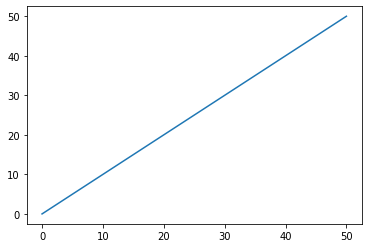

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array([0, 50])
y=np.array([0, 50])
plt.plot(x, y)
plt.show()

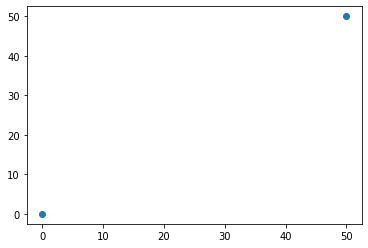

In [ ]:
plt.plot(x,y,'o')
plt.show()

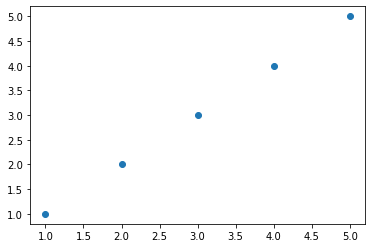

In [ ]:
plt.plot(np.array([1,2,3,4,5]),np.array([1,2,3,4,5]),'o')
plt.show()

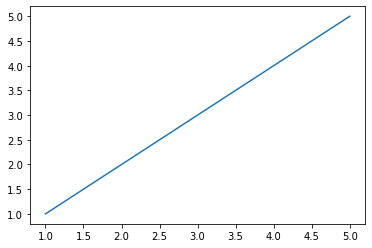

In [ ]:
plt.plot(np.array([1,2,3,4,5]),np.array([1,2,3,4,5]))
plt.show()

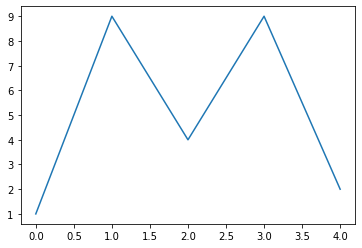

In [ ]:
y=np.array([1,9,4,9,2])
plt.plot(y)
plt.show()

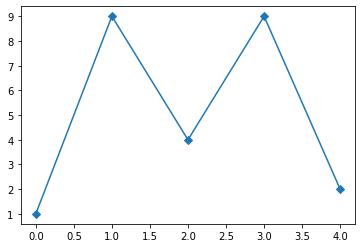

In [ ]:
y=np.array([1,9,4,9,2])
plt.plot(y,marker='D')
plt.show()

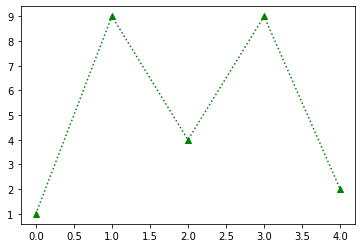

In [ ]:
plt.plot(y,'^:g')
plt.show()

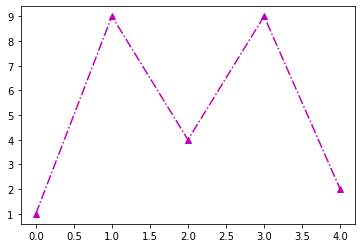

In [ ]:
plt.plot(y,'^-.m')
plt.show()

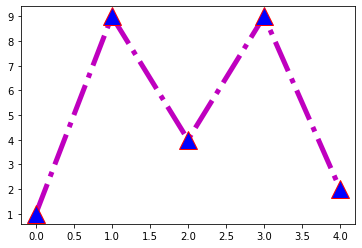

In [ ]:
plt.plot(y,'^-.m',ms=18,mec='r',mfc='b',lw='5')
plt.show()

In [ ]:
from imp import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

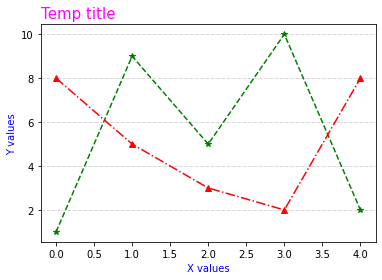

In [ ]:
y1=np.array([1,9,5,10,2])
y2=np.array([8,5,3,2,8])
plt.plot(y1,'*--g')
plt.plot(y2,'^-.r')
lfont={'family':'sans','color':'blue','size':'10'}
tfont={'family':'sans','color':'magenta','size':'15'}
plt.xlabel("X values",fontdict=lfont)
plt.ylabel("Y values",fontdict=lfont)
plt.title("Temp title",fontdict=tfont,loc="left")
plt.grid(axis='y',linewidth=0.5,linestyle='-.')
plt.show()

`Subplots`

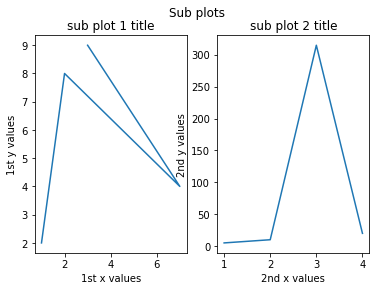

In [ ]:
x=np.array([1,2,7,3])
y=np.array([2,8,4,9])
plt.subplot(1, 2, 1)
plt.xlabel('1st x values')
plt.ylabel('1st y values')
plt.title('sub plot 1 title')
plt.plot(x,y)
x=np.array([1,2,3,4])
y=np.array([5,10,315,20])
plt.subplot(1, 2, 2)
plt.xlabel('2nd x values')
plt.ylabel('2nd y values')
plt.title('sub plot 2 title')
plt.suptitle('Sub plots')
plt.plot(x,y)
plt.show()

`Scatter plots // very imp`

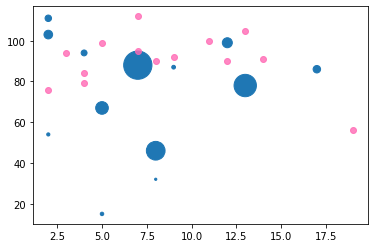

In [ ]:
x = np.array([2,8,5,7,2,17,2,9,4,13,12,5,8])
y = np.array([54,32,15,88,111,86,103,87,94,78,99,67,46])
si=np.array([10,5,12,800,42,56,75,14,35,500,100,160,350])
plt.scatter(x,y,s=si)
x = np.array([2,9,4,13,12,5,8,7,3,11,4,7,14,19])
y = np.array([76,92,84,105,90,99,90,95,94,100,79,112,91,56])
plt.scatter(x, y,c='hotpink',alpha=0.8)
plt.show()

`Bar`

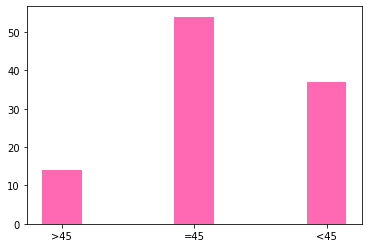

In [ ]:
x=np.array(['>45','=45','<45'])
y=np.array([14,54,37])
plt.bar(x,y,width=0.3,color='hotpink')
plt.show()

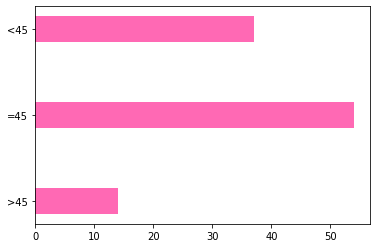

In [ ]:
x=np.array(['>45','=45','<45'])
y=np.array([14,54,37])
plt.barh(x,y,height=0.3,color='hotpink')
plt.show()

`Histograms`

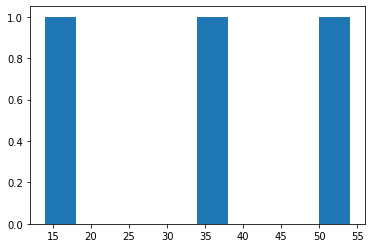

In [ ]:
plt.hist(y)
plt.show()

`We need huge number of close values for a perfect histogram`

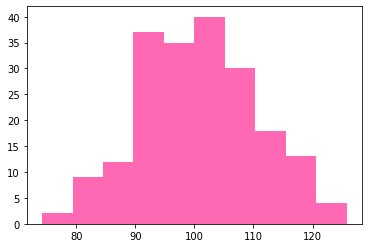

In [ ]:
x=np.random.normal(100, 10, 200)
plt.hist(x,color='hotpink')
plt.show()

`Pie`

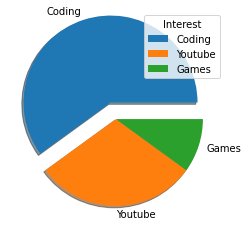

In [ ]:
x=np.array([60,30,10])
plt.pie(x,labels=np.array(['Coding','Youtube','Games']),explode=[0.2,0,0],shadow='True')
plt.legend(title='Interest')
plt.show()